In [8]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import glob as gb
import re

## img file

In [108]:
import glob as gb
import re

img_dir_path = '/projectdata/dysklab01/data/'
img_data_file_list = gb.glob1(img_dir_path,'*img.mat')
img_true_file_list = gb.glob1(img_dir_path,'*seg3D*')
img_data_dic, img_true_dic = dict(), dict()
img_keyname_list = []

for file_name in img_data_file_list:
    img_data_dic[re.findall('[0-9]{4}',file_name)[0]] = img_dir_path + file_name
for file_name in img_true_file_list:
    img_true_dic[re.findall('[0-9]{4}',file_name)[0]] = img_dir_path + file_name
assert len(img_data_dic) == len(img_true_dic), '## Number of input image should equal to that of labeled image ##'
img_keyname_list = list(img_data_dic.keys())
img_data_dic,'', img_true_dic, img_keyname_list

({'0930': '/projectdata/dysklab01/data/IMQ_D9_0930_Ch2_img.mat',
  '1015': '/projectdata/dysklab01/data/IMQ_D9_1015_Ch2_img.mat',
  '1030': '/projectdata/dysklab01/data/IMQ_D9_1030_Ch2_img.mat',
  '1045': '/projectdata/dysklab01/data/IMQ_D9_1045_Ch2_img.mat',
  '1100': '/projectdata/dysklab01/data/IMQ_D9_1100_Ch2_img.mat',
  '1115': '/projectdata/dysklab01/data/IMQ_D9_1115_Ch2_img.mat',
  '1130': '/projectdata/dysklab01/data/IMQ_D9_1130_Ch2_img.mat',
  '1230': '/projectdata/dysklab01/data/IMQ_D9_1230_Ch2_img.mat',
  '1400': '/projectdata/dysklab01/data/IMQ_D9_1400_Ch2_img.mat',
  '1430': '/projectdata/dysklab01/data/IMQ_D9_1430_Ch2_img.mat',
  '1445': '/projectdata/dysklab01/data/IMQ_D9_1445_Ch2_img.mat',
  '1530': '/projectdata/dysklab01/data/IMQ_D9_1530_Ch2_img.mat',
  '1545': '/projectdata/dysklab01/data/IMQ_D9_1545_Ch2_img.mat',
  '1800': '/projectdata/dysklab01/data/IMQ_D9_1800_Ch2_img.mat',
  '1815': '/projectdata/dysklab01/data/IMQ_D9_1815_Ch2_img.mat'},
 '',
 {'0930': '/project

In [114]:
# import scipy.io as sio
def load_img_data(key):
    ''' load img data,
    required variables: img_data_dic, img_keyname_list '''
    return sio.loadmat(img_data_dic[key])['img'] if key in img_keyname_list else None
def load_img_label(key):
    ''' load img label,
    required variables: img_true_dic, img_keyname_list '''
    return sio.loadmat(img_true_dic[key])['img'] if key in img_keyname_list else None

In [117]:

# for _, v in img_data_dic.items():
# load_img_data(img_keyname_list[0])

In [89]:
file = img_data_dic[img_keyname_list[0]]

In [ ]:
sio.loadmat

In [118]:
img = load_img_data(img_keyname_list[0])

In [119]:
img.shape

(512, 512, 100)

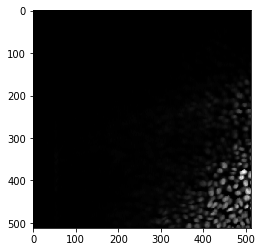

In [120]:
# Top view XY
plt.imshow(img[:,:,10].T,cmap='gray')

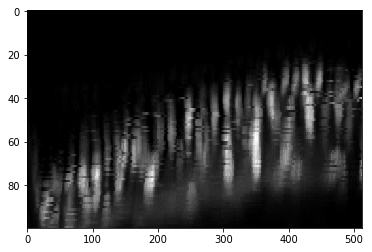

In [93]:
# Front view XZ
plt.imshow(img[:,5,:].T,cmap='gray',aspect='auto')

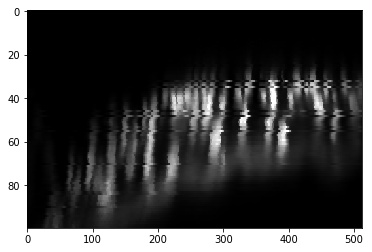

In [94]:
# Right view YZ
plt.imshow(img[5,:,:].T,cmap='gray',aspect='auto')

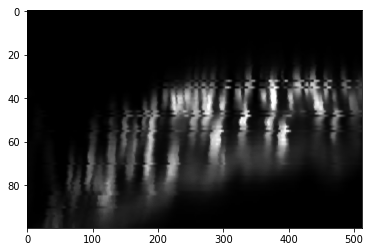

In [95]:
# Right view YZ
plt.imshow(img[5,:,:].T,cmap='gray',aspect='auto',interpolation='hamming')

## seg3D file

In [96]:
file = '/projectdata/dysklab01/data/IMQ_D9_1015_Ch2_seg3D.mat'
seg = sio.loadmat(file)
seg.keys()

dict_keys(['__header__', '__version__', '__globals__', 'seg3D', 'colorMap'])

In [97]:
smap = seg['colorMap']
seg3D = seg['seg3D']

In [98]:
smap.shape

(113886, 3)

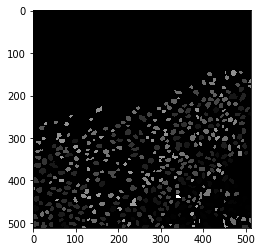

In [99]:
# Top view XY
plt.imshow(seg3D[:,:,10].T, cmap='gray')

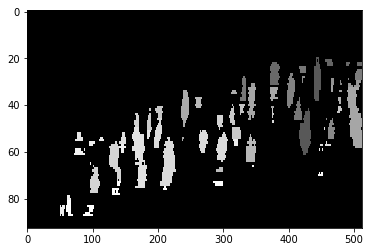

In [100]:
# Front view XZ
plt.imshow(seg3D[:,5,:].T,cmap='gray',aspect='auto')

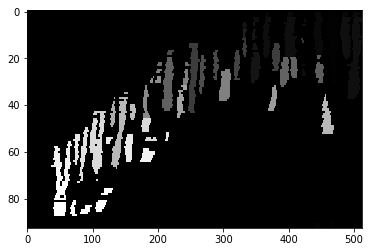

In [101]:
# Right view YZ
plt.imshow(seg3D[5,:,:].T,cmap='gray',aspect='auto')

In [104]:
import pandas as pd
aa = pd.DataFrame(seg3D[:,5,:])

In [105]:
unique_list = np.ndarray(1)
for i in aa.columns:
    unique_list = np.concatenate((unique_list, np.asarray(aa[i].unique())))

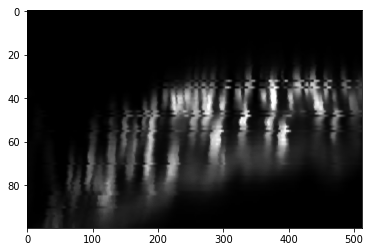

In [106]:
## compare rawdata and ground truth
# Right view YZ
plt.imshow(img[5,:,:].T,cmap='gray',aspect='auto',interpolation='hamming')

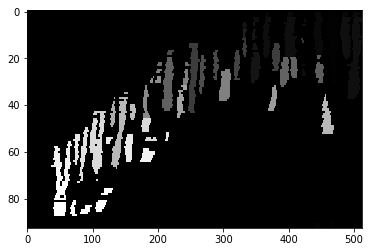

In [107]:
# Right view YZ
plt.imshow(seg3D[5,:,:].T,cmap='gray',aspect='auto')